# Cargamos la data de prueba

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

session_test = pd.read_csv('C:/Users/leo_2/Documents/nuwe-data-ds1/test/session_test.csv')
session_test

,user_id,session_id,timestamp,device_type,browser,operating_system,ip_address,country,search_query,page_views,session_duration
0,1982e6a0-077b-49f2-bc6e-84411c326f90,f0da5632-1c71-4c93-b2fd-f5423adc063c,2023-08-15 05:58:37,tablet,Edge,Windows,137.193.176.120,Kenya,As program perhaps high.,6,240
1,1982e6a0-077b-49f2-bc6e-84411c326f90,a48fbcc6-13a5-425c-9c2f-7413d8fd5e51,2023-10-22 22:47:09,desktop,Chrome,Windows,149.188.238.246,Svalbard & Jan Mayen Islands,Goal wonder allow ability get.,8,253
2,1982e6a0-077b-49f2-bc6e-84411c326f90,3f86b518-2dbd-4f81-b261-f16d6573f035,2023-01-06 21:33:30,mobile,Chrome,Android,218.150.179.144,Hungary,Month vote rich already stock.,7,196
3,1982e6a0-077b-49f2-bc6e-84411c326f90,14be0db1-c86f-4db0-b4b5-ff1a97615232,2023-10-07 04:50:38,desktop,Edge,macOS,40.157.118.33,United States Virgin Islands,Owner produce bring factor subject shoulder who.,10,126
4,1982e6a0-077b-49f2-bc6e-84411c326f90,5f5b2da5-4fa2-4877-b930-a57dd6303964,2023-08-25 15:54:55,mobile,Edge,Android,63.173.100.237,Mayotte,Ask key central rate within television appear.,8,138
...,...,...,...,...,...,...,...,...,...,...,...
3021,7f698378-a71e-4016-a43e-030fe6f9edc1,a28990ca-3ae5-43c5-a4a2-3bbadd6626f0,2023-09-10 06:23:15,desktop,Firefox,Linux,120.34.106.74,Solomon Islands,Deal then successful general and.,5,259
3022,7f698378-a71e-4016-a43e-030fe6f9edc1,9bc82d9b-da40-4e80-9433-dbee5531ec8b,2023-09-01 23:28:07,desktop,Firefox,Android,178.254.218.230,Saint Pierre and Miquelon,Detail together thousand oil after.,7,195
3023,7f698378-a71e-4016-a43e-030fe6f9edc1,26ec5017-d9e7-4d73-bb16-727216e3483b,2023-07-25 10:37:09,tablet,Edge,iOS,118.242.89.158,Guadeloupe,Ago quite especially foreign his truth art.,7,82
3024,7f698378-a71e-4016-a43e-030fe6f9edc1,adedae9e-bf6c-4a27-b765-9cf008ccf11f,2023-08-24 08:39:12,mobile,Firefox,Linux,205.215.143.159,Zambia,System either front design yet.,9,277


In [2]:
user_test = pd.read_csv('C:/Users/leo_2/Documents/nuwe-data-ds1/test/user_test.csv',sep=';')
user_test

,user_id,age,abandoned_cart,user_category,test_id
0,6647f967-609f-4ae3-986b-424ffbf0460a,52,True,new_user,1
1,ca149ac0-0832-4bcd-8af0-43c2d8f06556,45,True,new_user,2
2,b0d21d65-e040-418d-af69-0be68b456792,29,False,new_user,3
3,42519363-3dcf-445a-8116-dced9581cbd7,20,False,recurring_user,4
4,9d582590-d05e-4c79-8b18-3feb98864927,55,True,recurring_user,5
...,...,...,...,...,...
295,12902bc9-600d-41a8-9b41-99244745f1cc,65,False,recurring_user,296
296,e9bbadc2-2a4a-418a-87e9-accb2b5eb986,48,True,new_user,297
297,9453ab3d-e648-4600-b2ab-e326072831e7,55,True,recurring_user,298
298,dc991dad-dca8-4133-b47d-73103ceb8b33,55,False,recurring_user,299


# Cruzamos la data user & session

In [3]:
tabla = pd.merge(session_test, user_test, on='user_id', how='inner')

# Creamos nuevas variables en base al movimiento de los usuarios

In [4]:
def build_features(df_users, df_sessions):
    agg = df_sessions.groupby('user_id').agg({
        'session_id': 'count',
        'page_views': ['sum', 'mean'],
        'session_duration': ['sum', 'mean', 'max'],
        'device_type': pd.Series.nunique,
        'browser': pd.Series.nunique,
        'operating_system': pd.Series.nunique,
        'country': pd.Series.nunique,
        'search_query': 'count'
    })

    # Renombrar columnas
    agg.columns = ['_'.join(col).strip() for col in agg.columns.values]
    agg = agg.reset_index()

    # Merge con user data
    df_users = df_users.copy()
    df_users['abandoned_cart'] = df_users['abandoned_cart'].astype(int)
    df_users['user_category'] = df_users['user_category'].map({
        'new_user': 0,
        'recurring_user': 1,
        'premium_subscriber': 2
    })

    final = df_users.merge(agg, on='user_id', how='left')
    return final


In [5]:
user_features = build_features(user_test, session_test)

In [6]:
def asignar_generacion(anio_nacimiento):
    if anio_nacimiento >= 1998:
        return 'Gen Z'
    elif anio_nacimiento >= 1982:
        return 'Millennial'
    elif anio_nacimiento >= 1966:
        return 'Gen X'
    else:
        return 'Baby Boomer'


user_features['birth_year'] = 2025 - user_features['age']
user_features['generation'] = user_features['birth_year'].apply(asignar_generacion)
user_features.drop(columns=['birth_year'], inplace=True)
user_features.drop(columns=['age'], inplace=True)


labelizar = {
    'Gen Z': 0,
    'Millennial': 1,
    'Gen X': 2,
    'Baby Boomer': 3
    }

user_features['generation'] = user_features['generation'].map(labelizar)


# Ya tenemos el dataset de prueba final

In [7]:
X_test = user_features.copy()

In [8]:
X_test.drop(columns=['user_id','test_id'], inplace=True)

In [9]:
X_test

,abandoned_cart,user_category,session_id_count,page_views_sum,page_views_mean,session_duration_sum,session_duration_mean,session_duration_max,device_type_nunique,browser_nunique,operating_system_nunique,country_nunique,search_query_count,generation
0,1,0,5,27,5.400000,460,92.000000,166,3,3,3,5,5,2
1,1,0,14,89,6.357143,2560,182.857143,281,3,4,5,13,14,2
2,0,0,14,95,6.785714,1767,126.214286,276,3,4,5,14,14,1
3,0,1,8,53,6.625000,1200,150.000000,291,3,3,4,8,8,0
4,1,1,6,45,7.500000,936,156.000000,271,3,4,3,6,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,1,12,76,6.333333,1898,158.166667,295,3,3,5,12,12,3
296,1,0,11,68,6.181818,1762,160.181818,297,3,3,5,11,11,2
297,1,1,9,46,5.111111,1576,175.111111,295,3,4,5,9,9,2
298,0,1,5,29,5.800000,598,119.600000,291,2,3,4,5,5,2


# Cargamos el dataset previamente entrenado, pero tenemos que generarle las nuevas variables para crear el modelo

In [ ]:
# Llamaremos al train 

user_train = pd.read_csv('C:/Users/leo_2/Documents/nuwe-data-ds1/train/user_train.csv',sep=';')
session_train = pd.read_csv('C:/Users/leo_2/Documents/nuwe-data-ds1 /train/session_train.csv')

In [11]:
train = pd.merge(session_train, user_train, on='user_id', how='inner')

user_features_train = build_features(user_train, session_train)

user_features_train['birth_year'] = 2025 - user_features_train['age']
user_features_train['generation'] = user_features_train['birth_year'].apply(asignar_generacion)
user_features_train.drop(columns=['birth_year'], inplace=True)
user_features_train.drop(columns=['age'], inplace=True)


labelizar = {
    'Gen Z': 0,
    'Millennial': 1,
    'Gen X': 2,
    'Baby Boomer': 3
    }

user_features_train['generation'] = user_features_train['generation'].map(labelizar)


In [12]:
user_features_train

,user_id,abandoned_cart,user_category,marketing_target,session_id_count,page_views_sum,page_views_mean,session_duration_sum,session_duration_mean,session_duration_max,device_type_nunique,browser_nunique,operating_system_nunique,country_nunique,search_query_count,generation
0,a806c313-9bc3-4c1b-bdc4-24e9b0cdec8e,0,2,1,11,65,5.909091,2038,185.272727,285,3,4,5,11,11,1
1,c93cb31f-dab2-4d8f-b8de-ec5466b764c1,0,2,1,9,56,6.222222,1456,161.777778,297,3,4,5,9,9,2
2,262c06e0-96d7-45bc-bbff-060bae8a6f52,1,2,1,5,30,6.000000,872,174.400000,298,3,2,3,5,5,0
3,3eb387fe-6afc-4e23-9e3c-26457d97e446,0,1,1,7,46,6.571429,1101,157.285714,219,3,4,4,7,7,2
4,65596ffc-3bf1-4d45-8589-37bfce2f4d72,0,1,1,10,64,6.400000,1480,148.000000,277,3,4,5,10,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,a258e7d2-4b66-42bb-8d2a-97a773a300c3,1,1,1,11,67,6.090909,1583,143.909091,295,3,4,5,11,11,1
696,2f83ea3a-ef60-4273-acc9-e4c6bef2bde6,1,1,1,14,91,6.500000,1875,133.928571,263,3,4,5,13,14,0
697,b3244cfa-2778-4f64-9c46-9009627e055e,0,0,3,11,66,6.000000,1663,151.181818,297,3,4,5,11,11,2
698,8fa470c4-54a4-4265-aace-8c1f72ee3d77,0,0,3,5,26,5.200000,656,131.200000,286,2,3,3,5,5,1


# El dataset previmiamente entrenado, ya tiene la variable target de 3 clases

In [13]:
train = user_features_train.copy()
X_train = train.drop(columns=['user_id','marketing_target'])
y_train = train['marketing_target']


# Corregimos el desbalance con SMOTE, porque BOOSTRAP no parece ser muy bueno, (NOTA: LO HICE CON BOOSTRAP Y GENERALIZÓ DEMASIADO DÁNDOME F1 : 1.00)

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Partimos el dataset solo para validar el entrenamiento

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Estandarizamos 

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_val)

# Creamos y comparamos los modelos

## RandomForest

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=10, class_weight='balanced', n_jobs=-1  )
rf.fit(X_train_scaled, y_train) 
y_pred = rf.predict(X_test_scaled)

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('El accuracy del modelo es:',accuracy_score(y_val, y_pred))

print('La precisión del modelo es:',precision_score(y_val, y_pred, average='weighted'))
print('El recall del modelo es:',recall_score(y_val, y_pred, average='weighted'))
print('El F1 del modelo es:',f1_score(y_val, y_pred, average='weighted'))



El accuracy del modelo es: 0.877742946708464
La precisión del modelo es: 0.8816397794754361
El recall del modelo es: 0.877742946708464
El F1 del modelo es: 0.8785266756152806


## Regresión logística multiclase

In [19]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print('El accuracy del modelo de regresión logística es:', accuracy_score(y_val, y_pred_log))
print('La precisión del modelo de regresión logística es:', precision_score(y_val, y_pred_log, average='weighted'))
print('El recall del modelo de regresión logística es:', recall_score(y_val, y_pred_log, average='weighted'))
print('El F1 del modelo de regresión logística es:', f1_score(y_val, y_pred_log, average='weighted'))


El accuracy del modelo de regresión logística es: 0.7335423197492164
La precisión del modelo de regresión logística es: 0.7378818724317917
El recall del modelo de regresión logística es: 0.7335423197492164
El F1 del modelo de regresión logística es: 0.7350214985156412


## Árbol de decisión

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10, random_state=42,min_samples_leaf=3)
dt.fit(X_train_scaled, y_train)

y_pred_dt = dt.predict(X_test_scaled)

print('El accuracy del modelo de árbol de decisión es:', accuracy_score(y_val, y_pred_dt))
print('La precisión del modelo de árbol de decisión es:', precision_score(y_val, y_pred_dt, average='weighted'))
print('El recall del modelo de árbol de decisión es:', recall_score(y_val, y_pred_dt, average='weighted'))
print('El F1 del modelo de árbol de decisión es:', f1_score(y_val, y_pred_dt, average='weighted'))

El accuracy del modelo de árbol de decisión es: 0.7962382445141066
La precisión del modelo de árbol de decisión es: 0.8057616444391043
El recall del modelo de árbol de decisión es: 0.7962382445141066
El F1 del modelo de árbol de decisión es: 0.7977756059875629


# Cross-val score

In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=rf, X=X_train_scaled, y=y_train, cv=10, scoring='accuracy' )
print('Cross-validation scores:', scores)

Cross-validation scores: [0.8984375  0.8359375  0.8828125  0.8515625  0.81889764 0.81102362
 0.82677165 0.81889764 0.88976378 0.86614173]


In [22]:
print('CV accuracy: %.3f +/- %.3f' % (scores.mean(), scores.std()))

CV accuracy: 0.850 +/- 0.031


In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def graficar_curva_aprendizaje(modelo, X, y, titulo='Curva de Aprendizaje', cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Genera y grafica la curva de aprendizaje para un modelo dado.
    """
    print("📈 Generando curva de aprendizaje...")

    train_sizes, train_scores, val_scores = learning_curve(
        estimator=modelo,
        X=X,
        y=y,
        train_sizes=train_sizes,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        shuffle=True,
        random_state=42
    )

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', label='Entrenamiento', color='blue')
    plt.plot(train_sizes, val_mean, 'o-', label='Validación cruzada', color='green')
    plt.title(titulo)
    plt.xlabel("Cantidad de datos de entrenamiento")
    plt.ylabel(f"Score ({scoring})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


📈 Generando curva de aprendizaje...


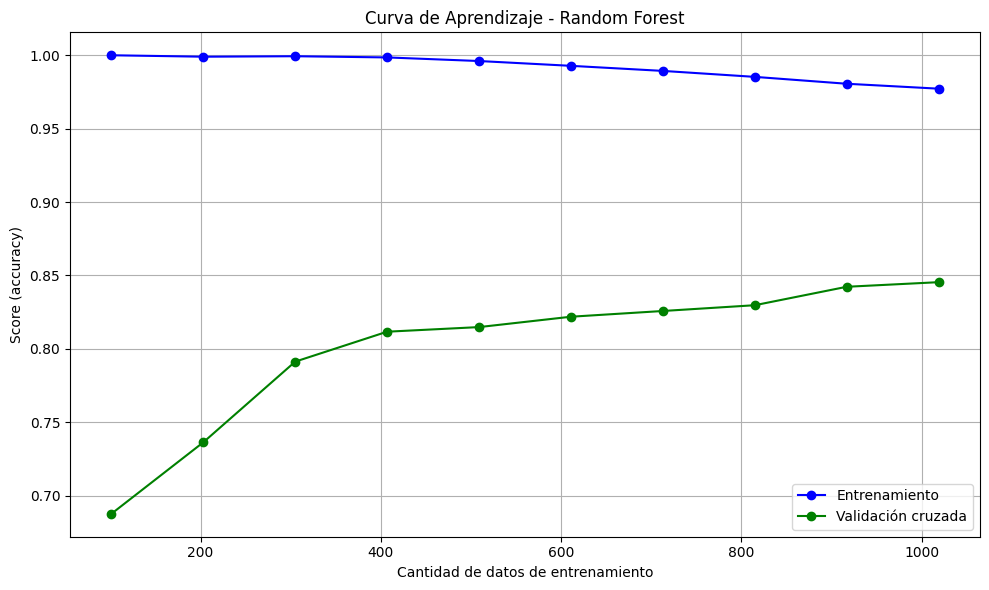

In [24]:
graficar_curva_aprendizaje(rf, X_train_scaled, y_train, titulo='Curva de Aprendizaje - Random Forest', cv=5, scoring='accuracy')